`ApJdataFrames` Erickson2011
---
`Title`: THE INITIAL MASS FUNCTION AND DISK FREQUENCY OF THE Rho OPHIUCHI CLOUD: AN EXTINCTION-LIMITED SAMPLE 
`Authors`: Erickson et al.

Data is from this paper:  
http://iopscience.iop.org/1538-3881/142/4/140/

In [1]:
%pylab inline

import seaborn as sns
sns.set_context("notebook", font_scale=1.5)

#import warnings
#warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

## Table 2- Optical Properties of Candidate Young Stellar Objects

In [3]:
addr = "http://iopscience.iop.org/1538-3881/142/4/140/suppdata/aj403656t2_ascii.txt"
names = ['F', 'Ap', 'Alt_Names', 'X-Ray ID', 'RA', 'DEC', 'Li', 'EW_Ha', 'I', 'R-I',
       'SpT_Lit', 'Spectral_Type', 'Adopt', 'Notes', 'blank']
tbl2 = pd.read_csv(addr, sep='\t', skiprows=[0,1,2,3,4], skipfooter=7, engine='python', na_values=" ... ", 
                   index_col=False, names = names, usecols=range(len(names)-1))
tbl2.head()

,F,Ap,Alt_Names,X-Ray ID,RA,DEC,Li,EW_Ha,I,R-I,SpT_Lit,Spectral_Type,Adopt,Notes
0,3,39,NaN,NaN,16 24 39.3,-24 07 10,NaN,1.1,15.31,1.41,NaN,K0-K2,K1,NaN
1,4,40,NaN,NaN,16 24 39.7,-24 35 08,NaN,-9.2,15.87,2.11,NaN,M4.5,M4.5,NaN
2,4,13,NaN,NaN,16 24 40.5,-24 43 09,NaN,<0.3,15.96,1.90,NaN,G5-K6,K0:,NaN
3,3,11,NaN,NaN,16 24 40.7,-24 21 40,NaN,0.90,14.83,1.49,NaN,K0-K2,K1,NaN
4,4,29,NaN,NaN,16 24 41.1,-24 17 49,NaN,> - 0.4,15.15,2.05,NaN,M1-M3,M2,NaN


## Table 3 - Association Members with Optical Spectra

In [4]:
addr = "http://iopscience.iop.org/1538-3881/142/4/140/suppdata/aj403656t3_ascii.txt"
names = ['F', 'Ap', 'Alt_Names', 'WMR', 'Spectral_Type', 'A_v', 'M_I',
       'log_T_eff', 'log_L_bol', 'Mass', 'log_age', 'Criteria', 'Notes', 'blank']
tbl3 = pd.read_csv(addr, sep='\t', skiprows=[0,1,2,3,4], skipfooter=9, engine='python', na_values=" ... ", 
                   index_col=False, names = names, usecols=range(len(names)-1))
tbl3.head()

,F,Ap,Alt_Names,WMR,Spectral_Type,A_v,M_I,log_T_eff,log_L_bol,Mass,log_age,Criteria,Notes
0,4,40,NaN,NaN,M4.5,2.1,9.03,3.488,-1.79,0.15,7.18,ext,NaN
1,4,29,NaN,NaN,M2,5.6,6.23,3.544,-0.82,0.32,6.46,ext,NaN
2,3,37,NaN,NaN,K7,6.8,3.96,3.602,0.06,0.42,5.65,ext,NaN
3,4,42,NaN,NaN,M4.5,2.3,7.83,3.488,-1.31,0.16,6.57,ext,NaN
4,NaN,NaN,RXJ 1624.9-2459,NaN,K5 (MMGC),0.3 (2M),6.91,3.638,-1.44,NaN,NaN,"pm,x",(1)


In [5]:
! mkdir ../data/Erickson2011

mkdir: ../data/Erickson2011: File exists


###The code to merge the tables isn't working

```python
on_F_ap = ["F", "Ap"]
on_name = "Alt_Names"
erickson2011 = pd.merge(tbl2, tbl3, on=on_F_ap, how="right")
erickson2011 = pd.merge(tbl2, erickson2011, on="Alt_Names", how="right")
message = "Table 2: {} entries \nTable 3: {} entries \nMerge: {} entries"
print message.format(len(tbl2), len(tbl3), len(erickson2011))
```

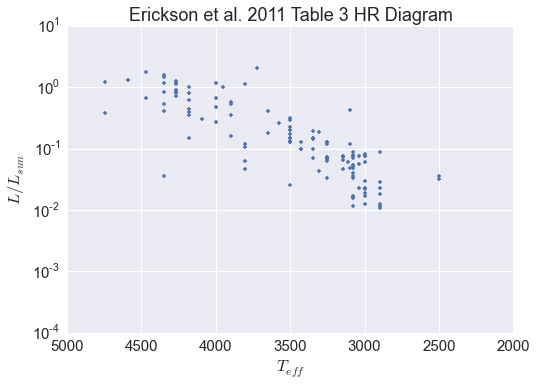

In [6]:
plt.plot(10**tbl3.log_T_eff, 10**tbl3.log_L_bol, '.')
plt.yscale("log")
plt.xlim(5000, 2000)
plt.ylim(1.0E-4, 1.0E1)
plt.xlabel(r"$T_{eff}$")
plt.ylabel(r"$L/L_{sun}$")
plt.title("Erickson et al. 2011 Table 3 HR Diagram")

Another thing to do would be to filter out the "Possible dwarfs", etc...  
Save the data tables locally.

In [7]:
tbl2.to_csv("../data/Erickson2011/tbl2.csv", sep="\t", index=False)
tbl3.to_csv("../data/Erickson2011/tbl3.csv", sep="\t", index=False)

*Script finished.*